## El mapeo Estándar




In [1]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

4-element Array{String,1}:
 "@"                                          
 "@v#.#"                                      
 "@stdlib"                                    
 "/home/evelyn/Documentos/Tesis/Programas/IPM"

In [2]:
using ParametrizacionMetodo
#using mapeos
using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays


In [3]:
#-------------------------------------------------------------------------------
"""
Estandar(x::Any, y::Any k::Real)

Función para el mapeo estándar con módulo 2pi.
"""
function Estandar(x::Any,y::Any,k::Real)
    x_n = mod(x+k*sin(y),2*pi)
    y_n = mod(x+y+k*sin(y),2*pi)
    return [x_n,y_n]
end

Estandar

In [4]:
function EstandarI(x,y,k)
   
    x_n = mod(x-k*sin(y-x),2pi)
    y_n = mod(y-x,2pi)

    return [x_n,y_n]
end

EstandarI (generic function with 1 method)

In [5]:
Estandar0(x,y)=Estandar(x,y,0.3)
#Estandar1(x,y)=Estandar(x+1., y+ pi/4.,0.3)

Estandar0 (generic function with 1 method)

In [6]:
Orden1 = 20
p_fijo_1 = [0.,0.] 
t_1 = [-10.,10.]
delta_t_1 = 0.125
Ws_0,Es_0,eigvec_s_0,eigval_s_0 = Estable(Estandar0, Orden1, p_fijo_1, t_1, delta_t_1);
Wu_0,Eu_0,eigvec_u_0,eigval_u_0 = Inestable(Estandar0, Orden1, p_fijo_1, t_1, delta_t_1);

In [7]:

function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo

    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #

    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)

        push!(iteradosMapX,F[1])
        push!(iteradosMapY,F[2])

        x = F[1]
        y = F[2]

    end

    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del

end

function GraficarEstandarMap(f)
    n = 50
    s=2pi/14.
    i=0.
    for p_i=0:s:2pi
        for x_i =0:s:2pi
            i=i+1
            x_ini=[p_i,x_i]
            a,b = IterarMap(f,x_ini,n)
            p = scatter(a,b,marker=".",s=0.1,color="gray")
        end
    end

end

function Evaluar(Tiempo, paso, Pol, PuntoFijo, col)
    ValX = Float64[]
    ValY = Float64[]

    push!(ValX, PuntoFijo[1])
    push!(ValY, PuntoFijo[2])
    #@show(ValX)
    for t = Tiempo[1]:paso:Tiempo[2]

        x = Float64(Pol[1](t))+PuntoFijo[1]
        y = Float64(Pol[2](t))+PuntoFijo[2]

        push!(ValX,mod(x,2pi))
        push!(ValY,mod(y,2pi))

    end

    #p = plot(ValX,ValY,linestyle = "",marker=",",color=col)
    p = scatter(ValX,ValY,marker=".", s=0.2)



    title("espacio fase")
    xlabel(L"$\theta$")
    ylabel(L"$p$")
    xlim(0.,2*pi)


end

function GraficarEst(Tiempo,paso,f,Pol,PuntoFijo,col)
    GraficarEstandarMap(f)
    Evaluar(Tiempo,paso,Pol,PuntoFijo,col)

end



GraficarEst (generic function with 1 method)

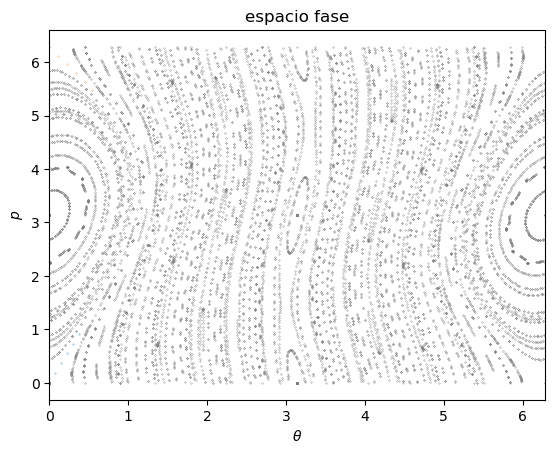

(0.0, 6.283185307179586)

In [8]:
GraficarEst([0.,-1.],-0.2,Estandar0,Ws_0,[0.,0],"orangered")
GraficarEst([0.,-1.],-0.2,Estandar0,Wu_0,[0.,2pi],"royalblue")

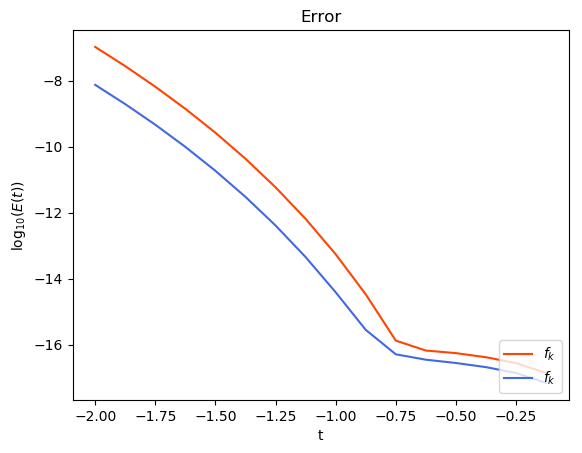

PyObject <matplotlib.legend.Legend object at 0x7f621601dac8>

In [9]:
ErrorU0 = CalculoError(Estandar0,2pi,Wu_0,Eu_0,[-2.,0.],delta_t_1)
ErrorS0 = CalculoError(Estandar0,2pi,Ws_0,Es_0,[-2.,0.],delta_t_1)
plot(ErrorS0[1],log10.(ErrorS0[2]),marker= "None", label=L"f_{k}",color="orangered")
plot(ErrorU0[1],log10.(ErrorU0[2]),marker= "None", label=L"f_{k}",color="royalblue")


xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

In [10]:
ps1 = Ws_0(-0.7)

2-element Array{Float64,1}:
 0.2663005352983504
 0.6413763781797225

In [11]:
pu1 = Wu_0(-0.7)
pu1 = [pu1[1],mod(pu1[2],2pi)]

2-element Array{Float64,1}:
 0.3959330419811341
 5.717618414822994 

In [12]:
Estandar0(0.156398,0.375076)

2-element Array{Float64,1}:
 0.26630097398223496
 0.6413769739822349 

In [13]:
Estandar0(0.641948,-0.9615)

2-element Array{Float64,1}:
 0.39593272208985186
 5.717618029269438  

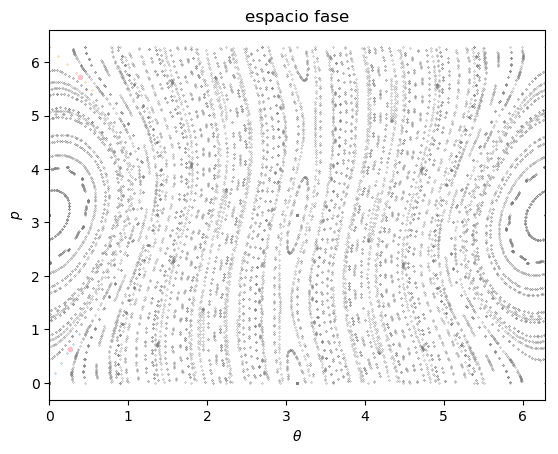

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6215e24898>

In [14]:
GraficarEst([0.,-1.],-0.2,Estandar0,Ws_0,[0.,0],"orangered")
GraficarEst([0.,-1.],-0.2,Estandar0,Wu_0,[0.,2pi],"royalblue")
plot(0.26630097398223496,
 0.6413769739822349,".",color="pink")
plot(0.39593272208985186, 
 5.717618029269438 ,".",color="pink")

In [15]:
Estandar1s(x,y)=Estandar(x+ 0.156398, y+0.375076,0.3)
Estandar1u(x,y)=Estandar(x+ 0.641948, y-0.9615,0.3)

Estandar1u (generic function with 1 method)

In [16]:
Orden1 = 20
p_fijo_1 = [0.,0.] 
p_fijo_2 = [0,2*pi]
t_1 = [-10.,10.]
delta_t_1 = 0.125
Ws_1,Es_1,eigvec_s_1,eigval_s_1 = Estable(Estandar1s, Orden1, p_fijo_1, t_1, delta_t_1);
Wu_1,Eu_1,eigvec_u_1,eigval_u_1 = Inestable(Estandar1u, Orden1, p_fijo_1, t_1, delta_t_1);

In [17]:
Wu_1(-0.7)#-Wu_0(-0.7)

2-element Array{Float64,1}:
  0.21793063477773839
 -0.5408255449278944 

In [18]:
Ws_1(-0.7)#-Ws_0(-0.7)

2-element Array{Float64,1}:
 0.2446911770577903
 0.619592821322127 

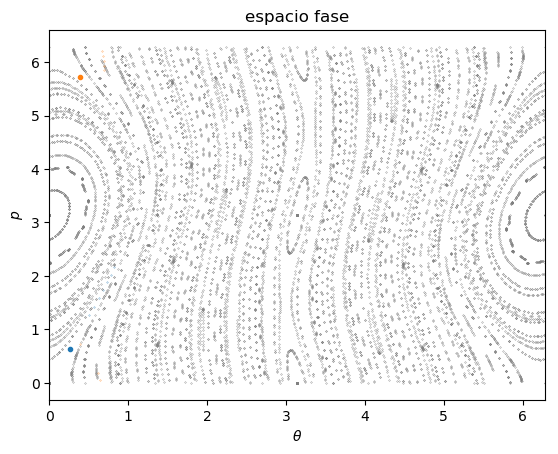

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6215815dd8>

In [19]:
GraficarEst([-0.7,-2.],-0.2,Estandar0,Ws_1,[0.2663,0.6413],"orangered")
GraficarEst([-0.7,-2.],-0.2,Estandar0,Wu_1,[0.3959,0.7176],"royalblue")
plot(0.26630097398223496,
 0.6413769739822349,".")
plot(0.39593272208985186, 
 5.717618029269438 ,".")

Visualizamos la parametrizacion obtenida.

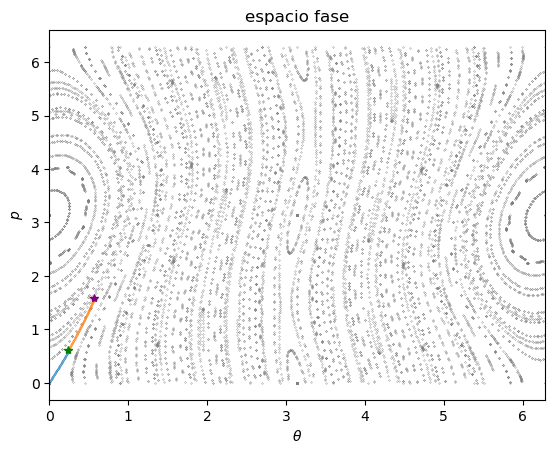

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f62153d7860>

In [20]:
GraficarEst([0.,-0.7],-0.01,Estandar0,Ws_0,[0.,0.],"orangered")
GraficarEst([-0.7,-2.],-0.01,Estandar0,Ws_1,[0.0,0.0],"royalblue")
#plot(Ws_0(-0.7)[1],Ws_0(-0.7)[2],".",color = "royalblue")
plot(Ws_1(-0.7)[1],Ws_1(-0.7)[2],"*", color ="green")
plot(Ws_1[1](-2.0),Ws_1[2](-2.0),"*", color="purple")

In [21]:
Ws_1(-2)

2-element Array{Float64,1}:
 0.572948135014268 
 1.5835010654572512

In [22]:
Estandar1s(0.162412,0.635477)

2-element Array{Float64,1}:
 0.5729477502292644
 1.5835007502292644

In [23]:
Estandar2s(x,y)= Estandar1s(x+0.162412, y+0.635477)

Estandar2s (generic function with 1 method)

In [24]:
Estandar2s(0.,0)

2-element Array{Float64,1}:
 0.5729477502292644
 1.5835007502292644

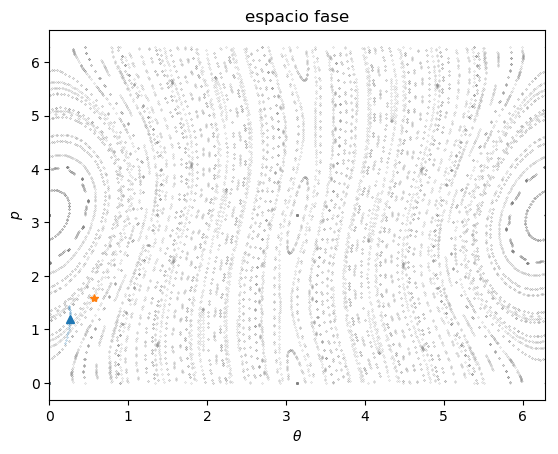

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f62151cb8d0>

In [25]:
Orden1 = 20
p_fijo_1 = [0.,0.] 
t_1 = [-10.,10.]
delta_t_1 = 0.125
Ws_2,Es_2,eigvec_s_2,eigval_s_2 = Estable(Estandar2s, Orden1, p_fijo_1, t_1, delta_t_1);
GraficarEst([-1.,-3.],-0.1,Estandar0,Ws_2,[0.0,0.0],"green")
#plot([Estandar2s(0,0)[1]],[Estandar2s(0.0)[2]],"*")
plot([Ws_2(-2)[1]],[Ws_2(-2)[2]],"^")
plot([Ws_1(-2)[1]],[Ws_1(-2)[2]],"*")

In [26]:
Ws_2(-2.0)

2-element Array{Float64,1}:
 0.26146219304787194
 1.1887285710209468 

In [27]:
Ws_1(-2.0)

2-element Array{Float64,1}:
 0.572948135014268 
 1.5835010654572512

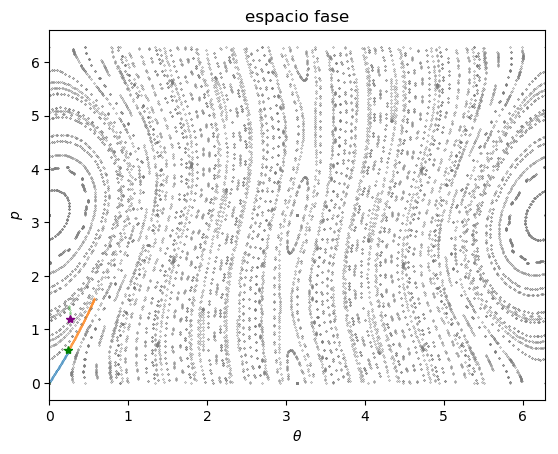

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6214b047b8>

In [28]:
GraficarEst([0.,-0.7],-0.01,Estandar0,Ws_0,[0.,0.],"orangered")
GraficarEst([-0.7,-2.],-0.01,Estandar0,Ws_1,[0.0,0.0],"royalblue")
GraficarEst([-2.,-3.],-0.1,Estandar0,Ws_2,[0.0,0.0],"blue")
#plot(Ws_0(-0.7)[1],Ws_0(-0.7)[2],".",color = "royalblue")
plot(Ws_1(-0.7)[1],Ws_1(-0.7)[2],"*", color ="green")
#plot(Ws_1[1](-2.0),Ws_1[2](-2.0),"*", color="purple")
plot(Ws_2[1](-2.0),Ws_2[2](-2.0),"*", color="purple")
#plot(Estandar2s(0,0),"*")

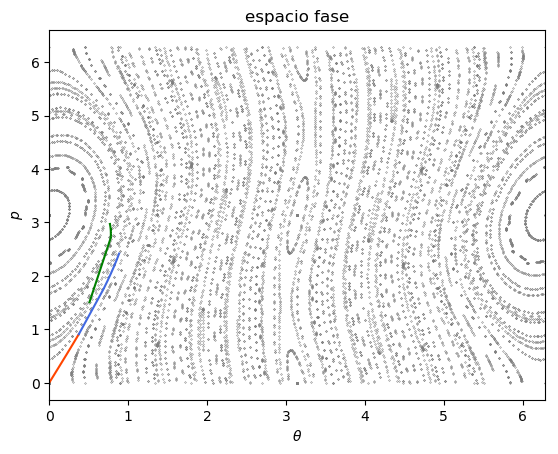

(0.0, 6.283185307179586)

In [219]:
GraficarEst([0.,-1.],-0.2,Estandar0,Ws_1,[0.,0.],"orangered")
GraficarEst([-1.,-2.],-0.2,Estandar0,Ws_2,[0.3758,0.9096],"royalblue")
GraficarEst([-2.,-3.],-0.1,Estandar0,Ws_3,[0.510649629026229,1.509560629026229],"green")

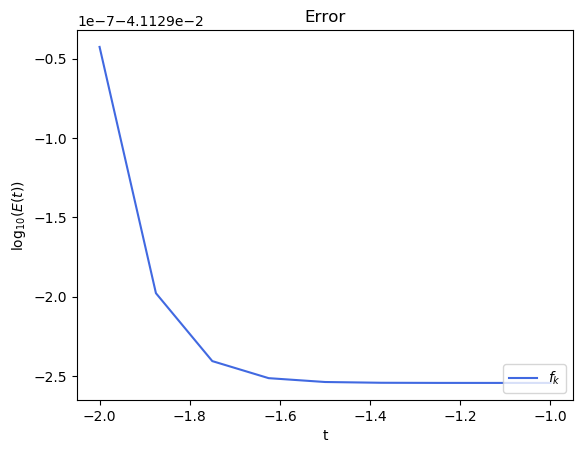

PyObject <matplotlib.legend.Legend object at 0x7fa9a2080b70>

In [150]:
#ErrorS1 = CalculoError(Estandar0,2pi,Ws_1,Es_1,[-1.,0.],delta_t_1)
ErrorS2 = CalculoError(Estandar1,2pi,Ws_2,Es_2,[-2.,-1],delta_t_1)
#plot(ErrorS1[1],log10.(ErrorS1[2]),marker= "None", label=L"f_{k}",color="orangered")
plot(ErrorS2[1],log10.(ErrorS2[2]),marker= "None", label=L"f_{k}",color="royalblue")
#plot(ErrorU1[1],log10.(ErrorU1[2]),marker= "None", label=L"f_{k}^{-1}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

Calculamos el error asociado a ambas parametrizaciones usando la funcion `CalculoError` que recibe el mapeo, el módulo si es el caso, las parametrizaciones, los polinomios del error(**Es_1,Eu_1**), el intervalo del parametro y el paso con el que se recorre el intervalo.

In [52]:
ErrorS1 = CalculoError(Estandar1,2pi, Ws_1,Es_1,[0.,3.],delta_t_1)
ErrorU1 = CalculoError(Estandar1,2pi, Wu_1,Eu_1,[0.,3.],delta_t_1)

2-element Array{Array{Float64,1},1}:
 [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125  …  1.875, 2.0, 2.125, 2.25, 2.375, 2.5, 2.625, 2.75, 2.875, 3.0]                                                   
 [1.51, 1.49728, 1.4823, 1.46521, 1.44625, 1.42563, 1.40361, 1.38046, 1.35644, 1.33183  …  1.18652, 1.16482, 1.14432, 1.12516, 1.10742, 1.0912, 1.07654, 1.06348, 1.05203, 1.04218]

Para poder observarlo lo graficamos en escala logaritmica.

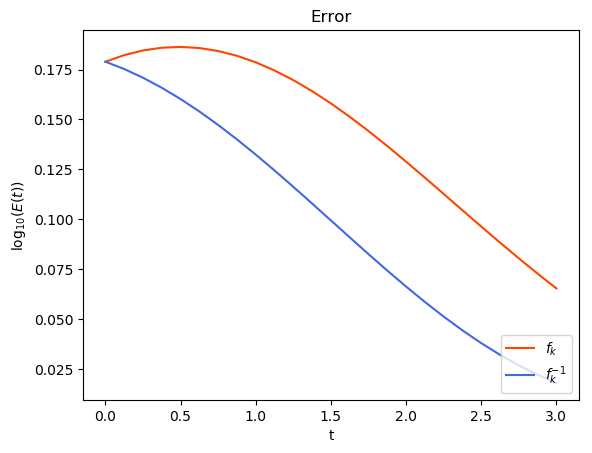

PyObject <matplotlib.legend.Legend object at 0x7fa9a0f38828>

In [53]:
plot(ErrorS1[1],log10.(ErrorS1[2]),marker= "None", label=L"f_{k}",color="orangered")
plot(ErrorU1[1],log10.(ErrorU1[2]),marker= "None", label=L"f_{k}^{-1}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

Analizamos la convergencia de los coeficientes del polinomio usando el criterio de Hadamard y lo graficamos

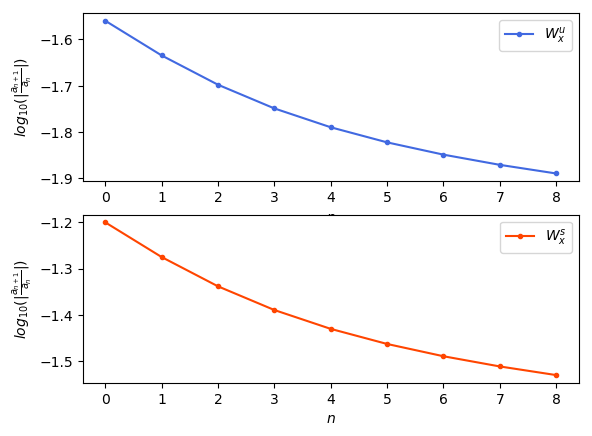

PyObject <matplotlib.legend.Legend object at 0x7feef90ecdd8>

In [9]:

ConverS_1=Convergencia(Ws_1[1],Ws_1[2])#Convergencia segun Hadamard
ConverU_1=Convergencia(Wu_1[1],Wu_1[2])


Cs1=[log10(abs(ConverS_1[1][i])) for i in 1:length(ConverS_1[1])]
Cu1=[log10(abs(ConverU_1[1][i])) for i in 1:length(ConverU_1[1])]

subplot(2,1,1)
plot(Cs1,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

Analizamos para diferentes valores del parametro y con diferentes ordenes de polinomio. Ademas saremos el mapeo inverso para calcular la parametrizacion de la variedad estable.

In [14]:
OrI = 120
x_fijo = [0.,0.] 
tiempo = [-13.,13.]
delta_t = 0.125
Ws_2, Es_2, eig_vec_s2, eig_val_s2 = Estable(estandar2,OrI , x_fijo,tiempo, delta_t);
Wu_2, Eu_2, eig_vec_u2, eig_val_u2 = Inestable(estandar2,OrI , x_fijo,tiempo, delta_t);

GraficarEst([-.1,-13.4], -0.25,estandar2, Ws_2,[0.,0.],"orangered")
GraficarEst([-0.1,-12.2], -0.25, estandar2, Wu_2,[0.,2pi],"royalblue")

tiem = [0.1,13.]
ErrorS_2 = CalculoError(estandar2,2*pi, Ws_2,Es_2,tiem,0.025 )
ErrorU_2 = CalculoError(estandar2,2*pi, Wu_2,Eu_2,tiem,0.025 )

figure()
plot(ErrorS_2[1],log10.(ErrorS_2[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorU_2[1],log10.(ErrorU_2[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

PyObject <matplotlib.legend.Legend object at 0x7fcb438f2358>

In [13]:
ConverS_2=Convergencia(Ws_2[1],Ws_2[2])#Convergencia segun Hadamard
ConverU_2=Convergencia(Wu_2[1],Wu_2[2])
Cs2=[log10(abs(ConverS_2[1][i])) for i in 1:length(ConverS_2[1])]
Cu2=[log10(abs(ConverU_2[1][i])) for i in 1:length(ConverU_2[1])]
pygui(true)
subplot(2,1,1)
plot(Cs2,marker=".",label=L"W^{u}_{\theta}",color="royalblue")
xlabel(L"n")
ylabel(L"log(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu2,marker=".",label=L"W^{s}_{\theta}",color="orangered")
xlabel(L"n")
ylabel(L"log(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )


PyObject <matplotlib.legend.Legend object at 0x7fcb48be8a20>

In [10]:
Orden3 = 30
p_fijo_3 = [0.,0.] 
t_3 = [-10.,10.]
delta_t_3 = 0.125

Ws_3,Es_3,eigvec_s_3,eigval_s_3 = Estable(estandar3, Orden3, p_fijo_3, t_3, delta_t_3);
Wu_3,Eu_3,eigvec_u_3,eigval_u_3 = Inestable(estandar3, Orden3, p_fijo_3, t_3, delta_t_3);
GraficarEst([-.1,-5.4], -0.25,estandar3, Ws_3,[0.,0.],"orangered")
GraficarEst([-0.1,-5.2], -0.25, estandar3, Wu_3,[0.,2pi],"royalblue")

tiem = [0.1,6.]
ErrorS_3 = CalculoError(estandar3,2*pi, Ws_3,Es_3,tiem,0.025 );
ErrorU_3 = CalculoError(estandar3,2*pi, Wu_3,Eu_3,tiem,0.025 );
figure()
plot(ErrorS_3[1],log10.(ErrorS_3[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorU_3[1],log10.(ErrorU_3[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )
figure()
ConverS_3=Convergencia(Ws_3[1],Ws_3[2])#Convergencia segun Hadamard
ConverU_3=Convergencia(Wu_3[1],Wu_3[2])
Cs3=[log10(abs(ConverS_3[1][i])) for i in 1:length(ConverS_3[1])]
Cu3=[log10(abs(ConverU_3[1][i])) for i in 1:length(ConverU_3[1])]

subplot(2,1,1)
title("Convergencia")
plot(Cs3,marker=".",label=L"W^{u}_{\theta}",color="royalblue")
#xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu3,marker=".",label=L"W^{s}_{\theta}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )



PyObject <matplotlib.legend.Legend object at 0x7fcb48568048>

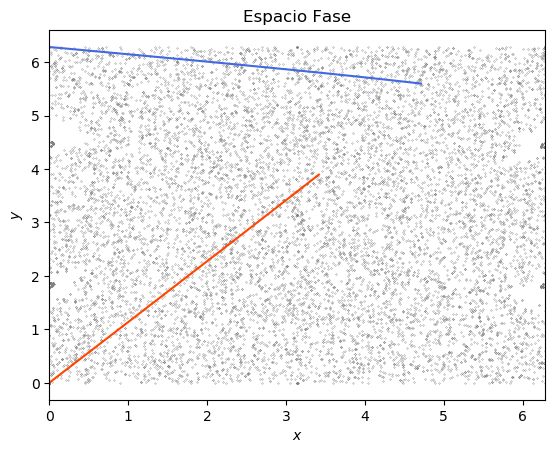

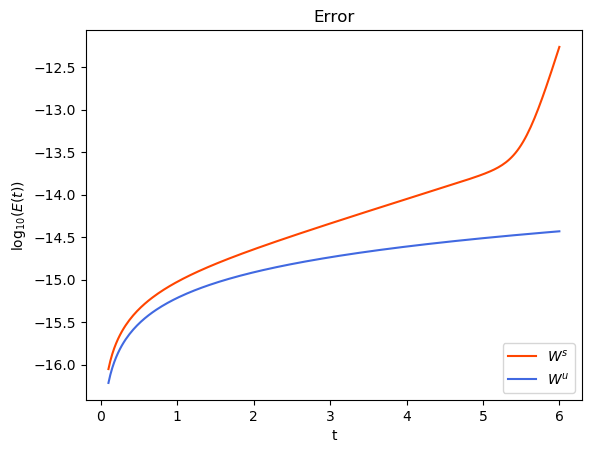

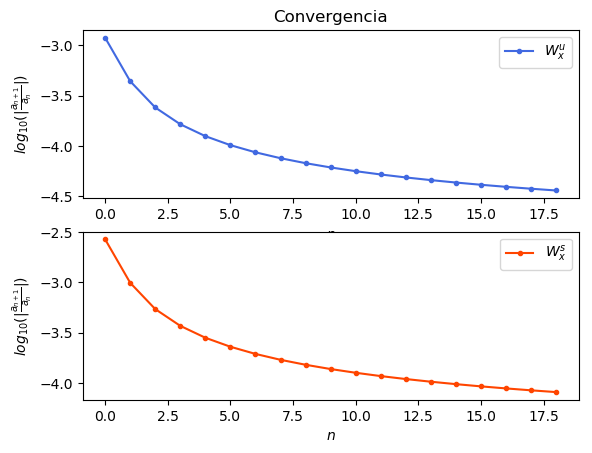

PyObject <matplotlib.legend.Legend object at 0x7feef8402e10>

In [13]:
Orden4 = 40
p_fijo_1 = [0.,0.] 
t_4 = [-10.,10.]
delta_t_4 = 0.125

Ws_4,Es_4,eigvec_s_4,eigval_s_4 = Estable(estandar4, Orden4, p_fijo_1, t_4, delta_t_4);
Wu_4,Eu_4,eigvec_u_4,eigval_u_4 = Inestable(estandar4, Orden4, p_fijo_1, t_4, delta_t_4);
GraficarEst([-.1,-5.4], -0.25,estandar4, Ws_4,[0.,0.],"orangered")
GraficarEst([-0.1,-5.2], -0.25, estandar4, Wu_4,[0.,2pi],"royalblue")

tiem = [0.1,6.]
ErrorS_4 = CalculoError(estandar4,2*pi, Ws_4,Es_4,tiem,0.025 );
ErrorU_4 = CalculoError(estandar4,2*pi, Wu_4,Eu_4,tiem,0.025 );
figure()
plot(ErrorS_4[1],log10.(ErrorS_4[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorU_4[1],log10.(ErrorU_4[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )
figure()
ConverS_4=Convergencia(Ws_4[1],Ws_4[2])#Convergencia segun Hadamard
ConverU_4=Convergencia(Wu_4[1],Wu_4[2])
Cs4=[log10(abs(ConverS_4[1][i])) for i in 1:length(ConverS_4[1])]
Cu4=[log10(abs(ConverU_4[1][i])) for i in 1:length(ConverU_4[1])]

subplot(2,1,1)
title("Convergencia")
plot(Cs4,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu4,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )



Podemos observar como se comporta el error cuando se va aumentando el orden del polinomio para el calculo de una variedad.

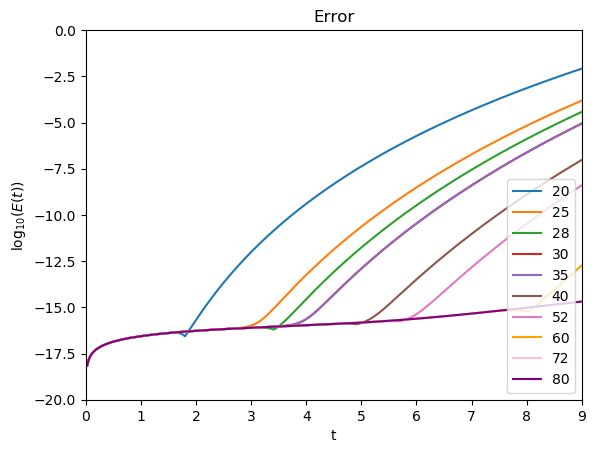

PyObject <matplotlib.legend.Legend object at 0x7feef85b0240>

In [14]:
or_a = 20
or_b = 25
or_c = 28
or_d = 30
or_e = 35
or_f = 40
or_g = 52
or_h = 60
or_i = 72
or_j = 80
x_fijo = [0.,0.]
tiempo = [0.,10.]
delta_t = 0.125
W_a, f_a, vec__a, val_a = Inestable(estandar2,or_a , x_fijo,tiempo, delta_t);
W_b, f_b, vec_b, val_b = Inestable(estandar2,or_b , x_fijo,tiempo, delta_t);
W_c, f_c, vec_c, val_c = Inestable(estandar2,or_c , x_fijo,tiempo, delta_t);
W_d, f_d, vec_d, val_d = Inestable(estandar2,or_d , x_fijo,tiempo, delta_t);
W_e, f_e, vec_e, val_e = Inestable(estandar2,or_d , x_fijo,tiempo, delta_t);
W_f, f_f, vec_f, val_f = Inestable(estandar2,or_e , x_fijo,tiempo, delta_t);
W_g, f_g, vec_g, val_g = Inestable(estandar2,or_f , x_fijo,tiempo, delta_t);
W_h, f_h, vec_h, val_h = Inestable(estandar2,or_g , x_fijo,tiempo, delta_t);
W_i, f_i, vec_i, val_i = Inestable(estandar2,or_h , x_fijo,tiempo, delta_t);
W_j, f_j, vec_j, val_j = Inestable(estandar2,or_i , x_fijo,tiempo, delta_t);


Tiempo = [0.,9.]
Error_a = CalculoError(estandar2, W_a,f_a,Tiempo,0.025);
Error_b = CalculoError(estandar2, W_b,f_b,Tiempo,0.025);
Error_c = CalculoError(estandar2, W_c,f_c,Tiempo,0.025);
Error_d = CalculoError(estandar2, W_d,f_d,Tiempo,0.025);
Error_e = CalculoError(estandar2, W_e,f_e,Tiempo,0.025);
Error_f = CalculoError(estandar2, W_f,f_f,Tiempo,0.025);
Error_g = CalculoError(estandar2, W_g,f_g,Tiempo,0.025);
Error_h = CalculoError(estandar2, W_h,f_h,Tiempo,0.025);
Error_i = CalculoError(estandar2, W_i,f_i,Tiempo,0.025);
Error_j = CalculoError(estandar2, W_j,f_j,Tiempo,0.025);



plot(Error_a[1],log10.(Error_a[2]),marker= "None", label="$or_a")
plot(Error_b[1],log10.(Error_b[2]),marker= "None", label="$or_b")
plot(Error_c[1],log10.(Error_c[2]),marker= "None", label="$or_c")
plot(Error_d[1],log10.(Error_d[2]),marker= "None", label="$or_d")
plot(Error_e[1],log10.(Error_e[2]),marker= "None", label="$or_e")
plot(Error_f[1],log10.(Error_f[2]),marker= "None", label="$or_f")
plot(Error_g[1],log10.(Error_g[2]),marker= "None", label="$or_g")
plot(Error_h[1],log10.(Error_h[2]),marker= "None", label="$or_h",color="orange")
plot(Error_i[1],log10.(Error_i[2]),marker= "None", label="$or_i",color ="pink")
plot(Error_j[1],log10.(Error_j[2]),marker= "None", label="$or_j",color ="purple")
xlabel("t")
ylabel(L"\log_{10}(E(t))")
title("Error")
xlim(0.,9.)
ylim(-20,0.)
legend(loc="lower right",fancybox="true",markerscale=3)

Si se usa numeros de presicion extendida el error disminuye.

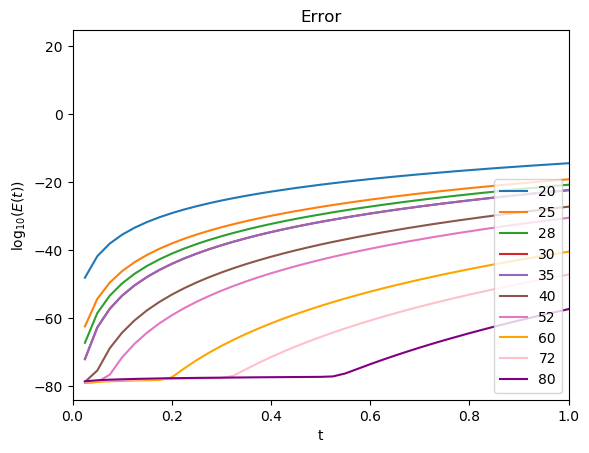

PyObject <matplotlib.legend.Legend object at 0x7feef8dd2a20>

In [23]:

x_fijo = [big(0.),big(0.)]
tiempo = [big(0.),big(10.)]
delta_t = big(0.125)
Wb_a, fb_a, vecb__a, valb_a = Inestable(estandar6,or_a , x_fijo,tiempo, delta_t);
Wb_b, fb_b, vecb_b, valb_b = Inestable(estandar6,or_b , x_fijo,tiempo, delta_t);
Wb_c, fb_c, vecb_c, valb_c = Inestable(estandar6,or_c , x_fijo,tiempo, delta_t);
Wb_d, fb_d, vecb_d, valb_d = Inestable(estandar6,or_d , x_fijo,tiempo, delta_t);
Wb_e, fb_e, vecb_e, valb_e = Inestable(estandar6,or_d , x_fijo,tiempo, delta_t);
Wb_f, fb_f, vecb_f, valb_f = Inestable(estandar6,or_e , x_fijo,tiempo, delta_t);
Wb_g, fb_g, vecb_g, valb_g = Inestable(estandar6,or_f , x_fijo,tiempo, delta_t);
Wb_h, fb_h, vecb_h, valb_h = Inestable(estandar6,or_g , x_fijo,tiempo, delta_t);
Wb_i, fb_i, vecb_i, valb_i = Inestable(estandar6,or_h , x_fijo,tiempo, delta_t);
Wb_j, fb_j, vecb_j, valb_j = Inestable(estandar6,or_i , x_fijo,tiempo, delta_t);


Tiempo = [big(0.),big(9.)]
delta = big(0.025)
Errorb_a = CalculoError(estandar6,big(2pi), Wb_a,fb_a,Tiempo,delta);
Errorb_b = CalculoError(estandar6,big(2pi), Wb_b,fb_b,Tiempo,delta);
Errorb_c = CalculoError(estandar6,big(2pi), Wb_c,fb_c,Tiempo,delta);
Errorb_d = CalculoError(estandar6,big(2pi), Wb_d,fb_d,Tiempo,delta);
Errorb_e = CalculoError(estandar6,big(2pi), Wb_e,fb_e,Tiempo,delta);
Errorb_f = CalculoError(estandar6,big(2pi), Wb_f,fb_f,Tiempo,delta);
Errorb_g = CalculoError(estandar6,big(2pi), Wb_g,fb_g,Tiempo,delta);
Errorb_h = CalculoError(estandar6,big(2pi), Wb_h,fb_h,Tiempo,delta);
Errorb_i = CalculoError(estandar6,big(2pi), Wb_i,fb_i,Tiempo,delta);
Errorb_j = CalculoError(estandar6,big(2pi), Wb_j,fb_j,Tiempo,delta);

b1=[Float64.(Errorb_a[1]),Float64.(Errorb_a[2])];
b2=[Float64.(Errorb_b[1]),Float64.(Errorb_b[2])];
b3=[Float64.(Errorb_c[1]),Float64.(Errorb_c[2])];
b4=[Float64.(Errorb_d[1]),Float64.(Errorb_d[2])];
b5=[Float64.(Errorb_e[1]),Float64.(Errorb_e[2])];
b6=[Float64.(Errorb_f[1]),Float64.(Errorb_f[2])];
b7=[Float64.(Errorb_g[1]),Float64.(Errorb_g[2])];
b8=[Float64.(Errorb_h[1]),Float64.(Errorb_h[2])];
b9=[Float64.(Errorb_i[1]),Float64.(Errorb_i[2])];
b10=[Float64.(Errorb_j[1]),Float64.(Errorb_j[2])];



plot(b1[1],log10.(b1[2]),marker= "None", label="$or_a")
plot(b2[1],log10.(b2[2]),marker= "None", label="$or_b")
plot(b3[1],log10.(b3[2]),marker= "None", label="$or_c")
plot(b4[1],log10.(b4[2]),marker= "None", label="$or_d")
plot(b5[1],log10.(b5[2]),marker= "None", label="$or_e")
plot(b6[1],log10.(b6[2]),marker= "None", label="$or_f")
plot(b7[1],log10.(b7[2]),marker= "None", label="$or_g")
plot(b8[1],log10.(b8[2]),marker= "None", label="$or_h",color="orange")
plot(b9[1],log10.(b9[2]),marker= "None", label="$or_i",color ="pink")
plot(b10[1],log10.(b10[2]),marker= "None", label="$or_j",color ="purple")
xlabel("t")
ylabel(L"\log_{10}(E(t))")
title("Error")
xlim(0.,1.)
legend(loc="lower right",fancybox="true",markerscale=3)


Podemos comprobar que usando el mapeo inverso para calcular la variedad estable se obtiene un menor error.

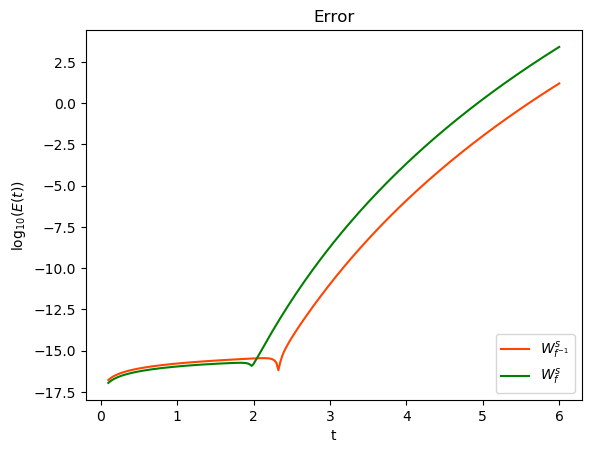

PyObject <matplotlib.legend.Legend object at 0x7feef8e92588>

In [16]:
Orden5 = 40
p_fijo_5 = [0.,0.] 
t_5 = [-10.,10.]
delta_t_5 = 0.125

Ws_5,Es_5,eigvec_s_5,eigval_s_5 = Inestable(estandarI, Orden5, p_fijo_5, t_5, delta_t_5);
Wss_5,Ess_5,eigvec_ss_5,eigval_ss_5 = Estable(estandar1, Orden5, p_fijo_5, t_5, delta_t_5);

tiem = [0.1,6.]
ErrorS_5 = CalculoError(estandarI,2*pi, Ws_5,Es_5,tiem,0.025 );
ErrorSS_5 = CalculoError(estandar1,2*pi, Wss_5,Ess_5,tiem,0.025 );
figure()
plot(ErrorS_5[1],log10.(ErrorS_5[2]),marker= "None", label=L"W_{f^{-1}}^{s}",color="orangered")
plot(ErrorSS_5[1],log10.(ErrorSS_5[2]),marker= "None", label=L"W_{f}^{s}",color="green")
title("Error")
xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
legend(loc="lower right",fancybox="true" )

Para calcular la interseccion entre las variedades podemos usar las paqueterias para encontrar raices. Para ello definimos la funcion `Interseccion`, que hara el polinomio del cual calculamos las raices.

In [55]:
OrI = 120
x_fijo = [0.,0.] 
tiempo = [-13.,13.]
delta_t = 0.125
Ws_2, Es_2, eig_vec_s2, eig_val_s2 = Inestable(estandar2I,OrI , x_fijo,tiempo, delta_t);
Wu_2, Eu_2, eig_vec_u2, eig_val_u2 = Inestable(estandar2,OrI ,[0.,0.] ,tiempo, delta_t);

#GraficarEst([-.1,-15.4], -0.25,estandar2, Ws_2,[0.,0.],"orangered")
#GraficarEst([-0.1,-15.2], -0.25, estandar2, Wu_2,[0.,2pi],"royalblue")


GraficarEst([-0.1,-15.4], -0.25,estandar2, Ws_2,[0.,0.],"orangered")
GraficarEst([-0.1,-15.2],- 0.25, estandar2, Wu_2,[0.,2pi],"royalblue")


tiem = [0.1,13.]
ErrorS_2 = CalculoError(estandar2I,2*pi, Ws_2,Es_2,tiem,0.025 )
ErrorU_2 = CalculoError(estandar2,2*pi, Wu_2,Eu_2,tiem,0.025 )



2-element Array{Array{Float64,1},1}:
 [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325  …  12.775, 12.8, 12.825, 12.85, 12.875, 12.9, 12.925, 12.95, 12.975, 13.0]                                                                                                                          
 [2.77528e-18, 3.4689e-18, 4.16239e-18, 4.85572e-18, 5.54887e-18, 6.24181e-18, 6.93451e-18, 7.62695e-18, 8.3191e-18, 9.01094e-18  …  4.0044e-14, 4.07917e-14, 4.15514e-14, 4.23231e-14, 4.31069e-14, 4.39028e-14, 4.4711e-14, 4.55315e-14, 4.63644e-14, 4.72097e-14]

In [57]:
figure()
plot(ErrorS_2[1],log10.(ErrorS_2[2]),marker= "None", label=L"W_{f^{-1}}^{u}=W^{s}",color="orangered")
plot(ErrorU_2[1],log10.(ErrorU_2[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log(E(t))$")
title("error")
#grid("on")
legend(loc="lower right",fancybox="true" )

PyObject <matplotlib.legend.Legend object at 0x7f36c65b5390>

In [15]:
function Intersección(p)
    (x,y)=p
    V= SVector( Ws_2[1](x)-Wu_2[1](y), Ws_2[2](x)-Wu_2[2](y) )
#    @show(p, V)
end

Intersección (generic function with 1 method)

Definimos un intervalo donde buscaremos la interseccion.

In [16]:
X = (-15.0..(-0.1))×(-15.0..(-0.1)) # 2D IntervalBox;

In [17]:
Intersección(X)

2-element SArray{Tuple{2},Interval{Float64},1,2}:
 [-388.169, 372.977]
  [-10.269, 12.867] 

In [18]:
r = roots(Intersección, X, Newton, 1e-6)

4-element Array{Root{IntervalBox{2,Float64}},1}:
 Root([-7.16826, -7.16825] × [-4.45972, -4.45971], :unique)
 Root([-2.24983, -2.24982] × [-14.2093, -14.2092], :unique)
 Root([-4.21757, -4.21756] × [-8.36029, -8.36028], :unique)
 Root([-13.4378, -13.4377] × [-2.62396, -2.62395], :unique)

In [1]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [2]:
pygui(true)

GraficarEst([-0.1,-15.4], -0.25,estandar2, Ws_2,[0.,0.],"orangered")
GraficarEst([-0.1,-15.2],- 0.25, estandar2, Wu_2,[0.,2pi],"royalblue")
colores=["gold","darkorange","seagreen","deepskyblue","violet","reed","dodgerblue"]
for ind in eachindex(r)
    plot(Ws_2[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         Ws_2[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o", color=colores[ind])
end
scatter([0.,0.,2pi,2pi],[0.,2pi,0.,2pi],color="limegreen")

UndefVarError: UndefVarError: GraficarEst not defined

In [ ]:
r[1].interval[1].hi<r[1].interval[1].lo

In [60]:
#pygui(true)
cfig = figure()
Graficar([-.1,-20.0], 0.025, 1.5, W3[1],W3[2],[0.,0.],"orangered")
Graficar([r[1].interval[1].hi,r[1].interval[1].lo], 1e-15, 1.5, W3[1],W3[2],[0.,0.],"green")
#Graficar([-.1,-15.307927223307495], 0.025, 1.5, W4[1],W4[2],[0.,0.],"royalblue")
#x1 = W3[1](r[1].interval[1].lo)
#y1 = W3[2](r[1].interval[1].lo)
#x2 = W3[1](r[1].interval[1].hi)
#y2 = W3[1](r[1].interval[1].hi)



#x_interval = W3[1].([r[1].interval[1].lo, r[1].interval[1].hi])
#y_interval = W3[2].([r[1].interval[1].lo, r[1].interval[1].hi])
#diam_x = x_interval[2]-x_interval[1]
#diam_y = y_interval[2]-y_interval[1]
#plot((x_interval[1],y_interval[1]),"o")

diam_x = qx-px
diam_y = sy-qy

#ax = cfig[:add_subplot](1,1,1)
#ax[:set_aspect]("equal")

#c = patch.Rectangle([px,py],1.3,1.3,fc="green",ec="red",linewidth=.5,alpha=0.2)
#plot([px,qx,sx,ux,px],[py,qy,sy,uy,py],"o",linestyle="-")
#c1 = patch.Rectangle([px,py],1.3,1.3,fc="blue",ec="red",linewidth=.5,alpha=0.2)
#c2 = patch.Rectangle([qx,qy],1.3,1.3,fc="red",ec="red",linewidth=.5,alpha=0.2)
#c3 = patch.Rectangle([ux,uy],1.3,1.3,fc="purpĺe",ec="red",linewidth=.5,alpha=0.2)
#ax[:add_artist](c)
#ax[:add_artist](c1)
#ax[:add_artist](c2)
#ax[:add_artist](c3)
cfig[:savefig]("rectangle.png")
grid("on")




UndefVarError: UndefVarError: W3 not defined

In [ ]:
tiem = [0.1,8.]
ErrorI = CalculoError(estandar2,2*pi, W3,f3,tiem,0.025 )
ErrorE = CalculoError(estandar2,2*pi, W4,f4,tiem,0.025 )
plot(ErrorI[1],log10.(ErrorI[2]),marker= "None", label=L"$W^{s}$",color="orangered")
plot(ErrorE[1],log10.(ErrorE[2]),marker= "None", label=L"$W^{u}$",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}$($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

In [ ]:
Graficar([-0.1,-5.307927223307495], 0.025, 0.7, W5[1],W5[2],[0.,0.],"orangered")
Graficar([-0.1,-4.9], 0.025, 0.7, W6[1],W6[2],[0.,0.],"royalblue")

In [ ]:
tiem = [0.1,5.]
ErrorA = CalculoError(estandar3,2*pi, W5,f5,tiem,0.025 )
ErrorB = CalculoError(estandar3,2*pi, W6,f6,tiem,0.025 )
plot(ErrorA[1],log10.(ErrorA[2]),marker= "None", label=L"$W^{s}$",color="orangered")
plot(ErrorB[1],log10.(ErrorB[2]),marker= "None", label=L"$W^{u}$",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}$($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

In [ ]:
Orden = 35
a= big(pi)
b=parse(BigFloat,"0.")
x_fijo = [b,b] 
c=parse(BigFloat,"4.")
tiempo = [-c,c]
delta_t = parse(BigFloat, "0.125")
W_uB, f_uB, vec_propuB, val_propuB = Inestable(g_estandar,Orden , x_fijo,tiempo, delta_t)
W_sB, f_sB, vec_propsB, val_propsB = Estable(g_estandar,Orden , x_fijo,tiempo, delta_t)

In [ ]:
Graficar([big(0.1),big(4.1)], big(0.025), big(0.3), W_uB[1],W_uB[2],[big(0.),big(0.)])
Graficar([big(0.1),5.], big(0.025), big(0.3), W_sB[1],W_sB[2],[big(0.),big(0.)])

In [ ]:
ErrorIB_O20 = CalculoError(g_estandar,big(2*pi), W_uB,f_uB,[-big(0.),big(4.)],big(0.025) )
ErrorEB_O20 = CalculoError(g_estandar,big(2*pi), W_sB,f_sB,[-big(0.),big(4.)],big(0.025 ))

In [ ]:
plot(ErrorIB_O20[1],log10(ErrorIB_O20[2]),marker= "None", label="Inestable 20")
plot(ErrorEB_O20[1],log10(ErrorEB_O20[2]),marker= "None", label="Estable 20")

xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

Cuidado! Esto es para graficar el error de diferentes órdenes de polinomios(tarda un poco)

In [94]:
O1 = 10
O2 = 20
O3 = 25
O4 = 28
O5 = 30
O6 = 40
O6 = 60
O7 = 80
O8 = 90

x_fijo = [0.,0.] 
tiempo = [0.,12.]
delta_t = 0.125
W1, f1, vec1, val1 = Inestable(estandar1,O1 , x_fijo,tiempo, delta_t);
W2, f2, vec2, val2 = Inestable(estandar1,O2 , x_fijo,tiempo, delta_t);
W3, f3, vec3, val3 = Inestable(estandar1,O3 , x_fijo,tiempo, delta_t);
W4, f4, vec4, val4 = Inestable(estandar1,O4 , x_fijo,tiempo, delta_t);
W5, f5, vec5, val5 = Inestable(estandar1,O5 , x_fijo,tiempo, delta_t);
W6, f6, vec6, val6 = Inestable(estandar1,O6 , x_fijo,tiempo, delta_t);
W7, f7, vec7, val7 = Inestable(estandar1,O7 , x_fijo,tiempo, delta_t);
W8, f8, vec8, val8 = Inestable(estandar1,O8 , x_fijo,tiempo, delta_t);
#W9, f9, vec9, val9 = Inestable(estandar1,O9 , x_fijo,tiempo, delta_t);
#W10, f10, vec10, val10 = Inestable(estandar6,O10 , x_fijo,tiempo, delta_t);

Error1A = CalculoError(estandar1, W1,f1,tiempo,0.025);
Error2A = CalculoError(estandar1, W2,f2,tiempo,0.025);
Error3A = CalculoError(estandar1, W3,f3,tiempo,0.025);
Error4A = CalculoError(estandar1, W4,f4,tiempo,0.025);
Error5A = CalculoError(estandar1, W5,f5,tiempo,0.025);
Error6A = CalculoError(estandar1, W6,f6,tiempo,0.025);
Error7A = CalculoError(estandar1, W7,f7,tiempo,0.025);
Error8A = CalculoError(estandar1, W8,f8,tiempo,0.025);
#Error9A = CalculoError(estanda16, W9,f9,tiempo,big(0.025 ));
#Error10A = CalculoError(estandar6, W10,f10,Tiempo,big(0.025 ));


plot(Error1A[1],log10.(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10.(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10.(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10.(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10.(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10.(Error6A[2]),marker= "None", label="$O6")
plot(Error7A[1],log10.(Error7A[2]),marker= "None", label="$O7")
plot(Error8A[1],log10.(Error8A[2]),marker= "None", label="$O8",color="orange")
#plot(Error9A[1],log10.(Error9A[2]),marker= "None", label="$O9",color ="pink")
xlabel("t")
ylabel(L"\log(E(t))")
#title("Error")
#grid("on")
xlim(0.,9.)
ylim(-20,5.)
legend(loc="lower right",fancybox="true",markerscale=3)

PyObject <matplotlib.legend.Legend object at 0x7f3ce3029c50>

In [95]:
O1 = 20
O2 = 25
O3 = 28
O4 = 30
O5 = 35
O6 = 40
O7 = 52
O8 = 60
O9 = 72
O10 = 80
x_fijo = [big(0.),big(0.)] 
tiempo = [-big(3.),big(3.)]
delta_t = big(0.125)
W1, f1, vec1, val1 = Inestable(estandar6,O1 , x_fijo,tiempo, delta_t);
W2, f2, vec2, val2 = Inestable(estandar6,O2 , x_fijo,tiempo, delta_t);
W3, f3, vec3, val3 = Inestable(estandar6,O3 , x_fijo,tiempo, delta_t);
W4, f4, vec4, val4 = Inestable(estandar6,O4 , x_fijo,tiempo, delta_t);
W5, f5, vec5, val5 = Inestable(estandar6,O5 , x_fijo,tiempo, delta_t);
W6, f6, vec6, val6 = Inestable(estandar6,O6 , x_fijo,tiempo, delta_t);
W7, f7, vec7, val7 = Inestable(estandar6,O7 , x_fijo,tiempo, delta_t);
W8, f8, vec8, val8 = Inestable(estandar6,O8 , x_fijo,tiempo, delta_t);
W9, f9, vec9, val9 = Inestable(estandar6,O9 , x_fijo,tiempo, delta_t);
W10, f10, vec10, val10 = Inestable(estandar6,O10 , x_fijo,tiempo, delta_t);

In [96]:
Tiempo = [big(0.),big(9.)]
Error1A = CalculoError(estandar6, W1,f1,Tiempo,big(0.025) );
Error2A = CalculoError(estandar6, W2,f2,Tiempo,big(0.025 ));
Error3A = CalculoError(estandar6, W3,f3,Tiempo,big(0.025 ));
Error4A = CalculoError(estandar6, W4,f4,Tiempo,big(0.025 ));
Error5A = CalculoError(estandar6, W5,f5,Tiempo,big(0.025 ));
Error6A = CalculoError(estandar6, W6,f6,Tiempo,big(0.025 ));
Error7A = CalculoError(estandar6, W7,f7,Tiempo,big(0.025 ));
Error8A = CalculoError(estandar6, W8,f8,Tiempo,big(0.025 ));
Error9A = CalculoError(estandar6, W9,f9,Tiempo,big(0.025 ));
Error10A = CalculoError(estandar6, W10,f10,Tiempo,big(0.025 ));



In [97]:
b1=[Float64.(Error1A[1]),Float64.(Error1A[2])];
b2=[Float64.(Error2A[1]),Float64.(Error2A[2])];
b3=[Float64.(Error3A[1]),Float64.(Error3A[2])];
b4=[Float64.(Error4A[1]),Float64.(Error4A[2])];
b5=[Float64.(Error5A[1]),Float64.(Error5A[2])];
b6=[Float64.(Error6A[1]),Float64.(Error6A[2])];
b7=[Float64.(Error7A[1]),Float64.(Error7A[2])];
b8=[Float64.(Error8A[1]),Float64.(Error8A[2])];
b9=[Float64.(Error9A[1]),Float64.(Error9A[2])];
b10=[Float64.(Error10A[1]),Float64.(Error10A[2])];


#grid("on")
#ylim(-16.,-15.2)
#legend(loc="low right",fancybox="true")

In [98]:
plot(b1[1],log10.(b1[2]),marker= "None", label="$O1")
plot(b2[1],log10.(b2[2]),marker= "None", label="$O2")
plot(b3[1],log10.(b3[2]),marker= "None", label="$O3")
plot(b4[1],log10.(b4[2]),marker= "None", label="$O4")
plot(b5[1],log10.(b5[2]),marker= "None", label="$O5")
plot(b6[1],log10.(b6[2]),marker= "None", label="$O6")
plot(b7[1],log10.(b7[2]),marker= "None", label="$O7", color="orange")
plot(b8[1],log10.(b8[2]),marker= "None", label="$O8", color ="lightgreen" )
plot(b9[1],log10.(b9[2]),marker= "None", label="$O9", color="royalblue")
plot(b10[1],log10.(b10[2]),marker= "None", label="$O10",color="pink")

xlabel("t")
ylabel(L"\log(E(t))")
#title("Error")
legend(loc="low right",fancybox="true")

PyObject <matplotlib.legend.Legend object at 0x7f3cfe683f60>

In [ ]:
O2 = 20
O1 = 10
O5 = 30
O6 = 40
O3 = 25
O4 = 28
O7 = 60
O9 = 90
O8 = 80
x_fijo = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
V1, h1, vec1, val1 = Estable(estandar1,O1 , x_fijo,tiempo, delta_t); 
V2, h2, vec2, val2 = Estable(estandar1,O2 , x_fijo,tiempo, delta_t); 
V3, h3, vec3, val3 = Estable(estandar1,O3 , x_fijo,tiempo, delta_t); 
V4, h4, vec4, val4 = Estable(estandar1,O4 , x_fijo,tiempo, delta_t); 
V5, h5, vec5, val5 = Estable(estandar1,O5 , x_fijo,tiempo, delta_t); 
V6, h6, vec6, val6 = Estable(estandar1,O6 , x_fijo,tiempo, delta_t); 
V7, h7, vec7, val7 = Estable(estandar1,O7 , x_fijo,tiempo, delta_t); 
V8, h8, vec8, val8 = Estable(estandar1,O8 , x_fijo,tiempo, delta_t); 
V9, h9, vec9, val9 = Estable(estandar1,O9 , x_fijo,tiempo, delta_t);

In [ ]:
Tiempo = [0.,7.]
Error1A = CalculoError(estandar1, V1,h1,Tiempo,0.025 );
Error2A = CalculoError(estandar1, V2,h2,Tiempo,0.025 );
Error3A = CalculoError(estandar1, V3,h3,Tiempo,0.025 );
Error4A = CalculoError(estandar1, V4,h4,Tiempo,0.025 );
Error5A = CalculoError(estandar1, V5,h5,Tiempo,0.025 );
Error6A = CalculoError(estandar1, V6,h6,Tiempo,0.025 );
Error7A = CalculoError(estandar1, V7,h7,Tiempo,0.025 );
Error8A = CalculoError(estandar1, V8,h8,Tiempo,0.025 );
Error9A = CalculoError(estandar1, V9,h9,Tiempo,0.025 );



In [ ]:
plot(Error1A[1],log10.(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10.(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10.(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10.(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10.(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10.(Error6A[2]),marker= "None", label="$O6")
plot(Error7A[1],log10.(Error7A[2]),marker= "None", label="$O7")
plot(Error8A[1],log10.(Error8A[2]),marker= "None", label="$O8",color="orange")
plot(Error9A[1],log10.(Error9A[2]),marker= "None", label="$O9",color ="pink")
xlabel("t")
ylabel(L"\log_{10}(E(t))")
#title("Error")
#grid("on")
xlim(0.,9.)
ylim(-20,9.)
legend(loc="lower right",fancybox="true",markerscale=3)

In [17]:
scatter([1,2,3],[1,1,1],color="red")

PyObject <matplotlib.collections.PathCollection object at 0x7f3cf0542d30>

In [108]:
Or07 = 25
x_fijo = [0.,0.] 
tiempo = [0.,3.]
delta_t = 0.125
Ws_15, Es_15, eig_vec_s15, eig_val_s15 = Estable(estandar1,Or15 , x_fijo,tiempo, delta_t);
Wu_15, Eu_15, eig_vec_u15, eig_val_u15 = Inestable(estandar1,Or15 , x_fijo,tiempo, delta_t);
pygui(true)
GraficarEst([-.1,-3.5], -0.025,estandar1, Ws_15,[0.,0.],"orangered")
GraficarEst([-0.1,-3.5], -0.025, estandar1, Wu_15,[0.,2pi],"royalblue")
scatter([0.,0.,2pi,2pi],[0.,2pi,0.,2pi],color="lawngreen")











PyObject <matplotlib.collections.PathCollection object at 0x7f3cd9544860>

In [109]:
figure()
#plot(ErrorS_03[1],log10.(ErrorS_03[2]),marker= "None", label=L"W^{s}",color="orangered")
#plot(ErrorU_03[1],log10.(ErrorU_03[2]),marker= "None", label=L"W^{u}",color="royalblue")
tiem = [0.1,3.5]
ErrorS_15 = CalculoError(estandar1,2*pi, Ws_15,Es_15,tiem,0.025 )
ErrorU_15 = CalculoError(estandar1,2*pi, Wu_15,Eu_15,tiem,0.025 )
plot(ErrorS_15[1],log10.(ErrorS_15[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorU_15[1],log10.(ErrorU_15[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log(E(t))$")
title("error")
#grid("on")
legend(loc="lower right",fancybox="true" )

PyObject <matplotlib.legend.Legend object at 0x7f3cd9357518>